# After analysis of bivariate stats by Lachlan
Looking at them there are a few things I think we should bear in mind:

•	Can we check predictor g214024_claim_cnt? This has the highest difference in the rate it fires between positives and negatives. Might be worth having a quick glance at the density plot for this variable split by outcome.

•	The following predictors have very high maximum values in the negatives relative to their maximum values in the positives: s26_claim_cnt, c99283_claim_cnt, s14_claim_cnt, which are Infectious disease, Emergency department visit, and Diagnostic radiology respectively. I think we can just bear these in mind for now, however on Strongbridge predictors like these came way up at the top of the VI table.

•	A number of very general predictors (office outpatient visits, MRI scans, annual wellness visits) have high maximum values in the negatives but are empty in the positives.

Frederick lets have a look at these tomorrow (v high negative mean, 0 positive mean):

c99201_max_min_dd

c72131_max_min_dd

hg0438_max_min_dd

c73721_max_min_dd

In [1]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)

Populating the interactive namespace from numpy and matplotlib


In [3]:
df = pd.read_feather(r'F:\Projects\Pfizer_mCRPC\Data\Raw_data\04_total_with_datediff_and_dummies.feather')

In [4]:
df_prod = pd.read_csv(r'F:\Projects\Pfizer_mCRPC\Data\Raw_data\NDW Clinical Codes\V_PRODUCT.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (54) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [12]:
df_proc = pd.read_excel(r'F:\Projects\Pfizer_mCRPC\Data\Raw_data\NDW Clinical Codes\V_PROCEDURE.xlsx')

## g214024_claim_cnt

In [5]:
# The description of g214024
df_prod[df_prod['GPI6_CD'] == 214024]['GPI6_DESC'].unique()[0]

'ANTIANDROGENS***'

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


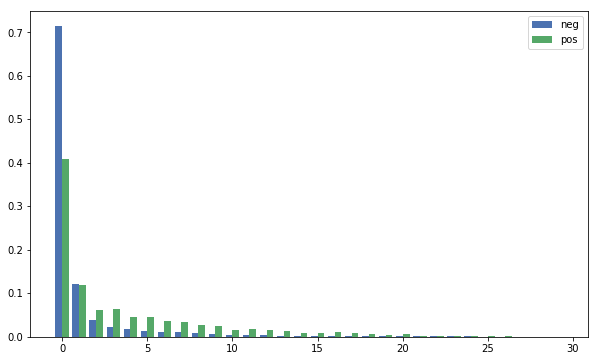

In [6]:
colname = 'g214024_claim_cnt'
# max_val = max(df[colname]) 
max_val = 30
bins = np.array(range(-1, max_val)) + 0.5

neg = df[df['pn_flag'] == 0][colname]
pos = df[df['pn_flag'] == 1][colname]

plt.style.use('seaborn-deep')
_ = plt.hist([neg, pos], bins = bins, normed = True, label = ['neg', 'pos'])
plt.legend(loc='upper right')
plt.show()

1023

## c99201_max_min_dd

In [23]:
# Description of c99201
df_proc[df_proc['PRC_STD_CD'] == '99201']['PRC_DESC'].tolist()

["OFFICE OR OTHER OUTPATIENT VISIT FOR THE EVALUATION AND MANAGEMENT OF A NEW PATIENT, WHICH REQUIRES THESE 3 KEY COMPONENTS: A PROBLEM FOCUSED HISTORY; A PROBLEM FOCUSED EXAMINATION; STRAIGHTFORWARD MEDICAL DECISION MAKING. COUNSELING AND/OR COORDINATION OF CARE WITH OTHER PHYSICIANS, OTHER QUALIFIED HEALTH CARE PROFESSIONALS, OR AGENCIES ARE PROVIDED CONSISTENT WITH THE NATURE OF THE PROBLEM(S) AND THE PATIENT'S AND/OR FAMILY'S NEEDS. USUALLY, THE PRESENTING PROBLEM(S) ARE SELF LIMITED OR MINOR. TYPICALLY, 10 MINUTES ARE SPENT FACE-TO-FACE WITH THE PATIENT AND/OR FAMILY."]

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


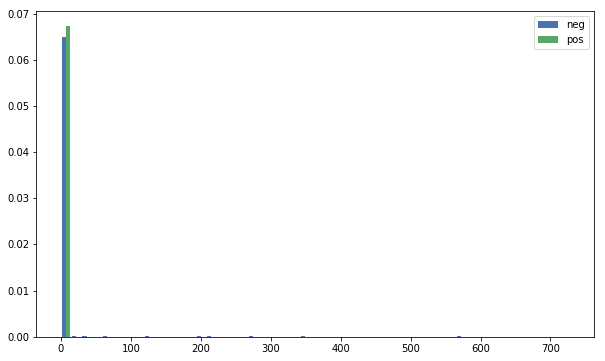

(0, 0.001)

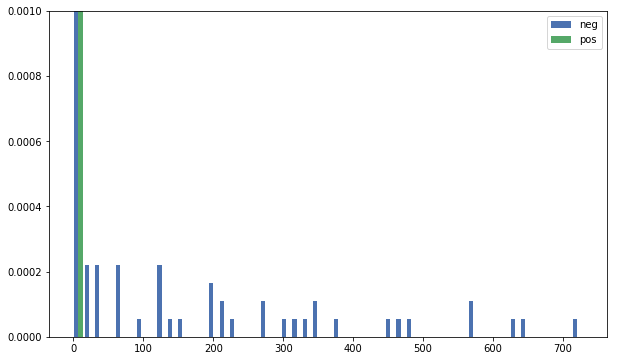

In [7]:
colname = 'c99201_max_min_dd'
max_val = max(df[~df[colname].isnull()][colname])
bins = np.linspace(-0.5, max_val, 50)

neg = df[df['pn_flag'] == 0][colname]
neg = neg[~neg.isnull()]
pos = df[df['pn_flag'] == 1][colname]
pos = pos[~pos.isnull()]

# Full range
plt.style.use('seaborn-deep')
_ = plt.hist([neg, pos], bins = bins, normed = True, label = ['neg', 'pos'])
plt.legend(loc='upper right')
plt.show()

# Zoom in on the lower side of the y-axis
plt.style.use('seaborn-deep')
_ = plt.hist([neg, pos], bins = bins, normed = True, label = ['neg', 'pos'])
plt.legend(loc='upper right')
plt.ylim((0,0.001))
plt.show()

## c72131_max_min_dd 

In [24]:
# Description of c99201
df_proc[df_proc['PRC_STD_CD'] == '72131']['PRC_DESC'].tolist()

['COMPUTED TOMOGRAPHY, LUMBAR SPINE; WITHOUT CONTRAST MATERIAL']

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


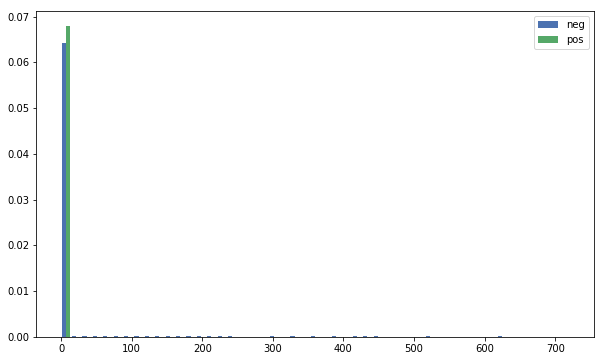

(0, 0.001)

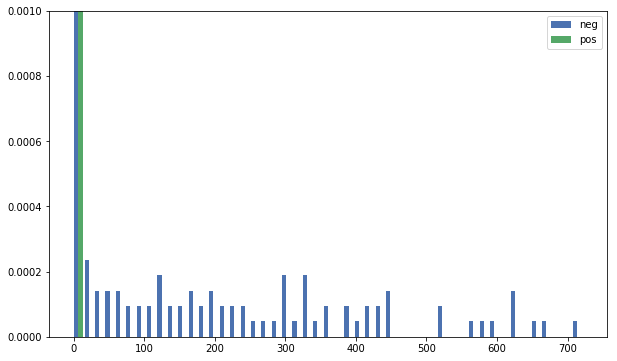

In [25]:
colname = 'c72131_max_min_dd'
max_val = max(df[~df[colname].isnull()][colname])
bins = np.linspace(-0.5, max_val, 50)

neg = df[df['pn_flag'] == 0][colname]
neg = neg[~neg.isnull()]
pos = df[df['pn_flag'] == 1][colname]
pos = pos[~pos.isnull()]

# Full range
plt.style.use('seaborn-deep')
_ = plt.hist([neg, pos], bins = bins, normed = True, label = ['neg', 'pos'])
plt.legend(loc='upper right')
plt.show()

# Zoom in on the lower side of the y-axis
plt.style.use('seaborn-deep')
_ = plt.hist([neg, pos], bins = bins, normed = True, label = ['neg', 'pos'])
plt.legend(loc='upper right')
plt.ylim((0,0.001))
plt.show()

## hg0438_max_min_dd 

In [27]:
# Description of c99201
df_proc[df_proc['PRC_STD_CD'] == 'G0438']['PRC_DESC'].tolist()

['ANNUAL WELLNESS VISIT; INCLUDES A PERSONALIZED PREVENTION PLAN OF SERVICE (PPS), INITIAL VISIT']

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


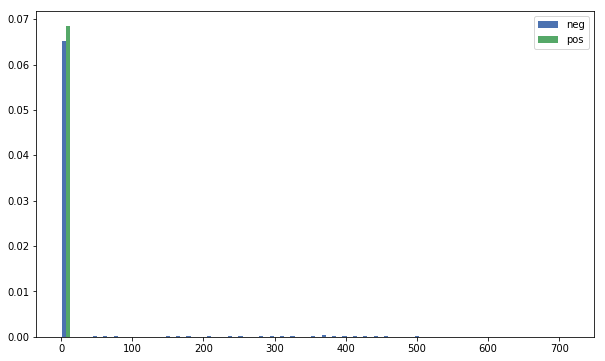

(0, 0.001)

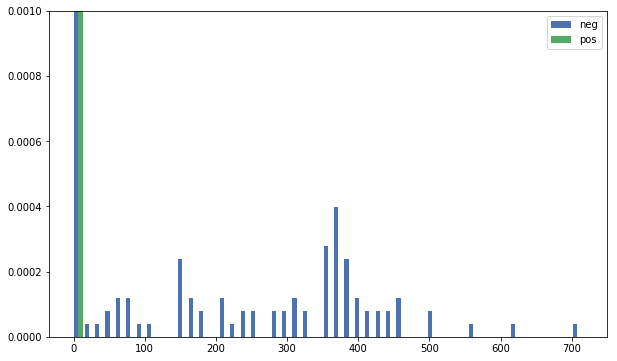

In [28]:
colname = 'hg0438_max_min_dd'
max_val = max(df[~df[colname].isnull()][colname])
bins = np.linspace(-0.5, max_val, 50)

neg = df[df['pn_flag'] == 0][colname]
neg = neg[~neg.isnull()]
pos = df[df['pn_flag'] == 1][colname]
pos = pos[~pos.isnull()]

# Full range
plt.style.use('seaborn-deep')
_ = plt.hist([neg, pos], bins = bins, normed = True, label = ['neg', 'pos'])
plt.legend(loc='upper right')
plt.show()

# Zoom in on the lower side of the y-axis
plt.style.use('seaborn-deep')
_ = plt.hist([neg, pos], bins = bins, normed = True, label = ['neg', 'pos'])
plt.legend(loc='upper right')
plt.ylim((0,0.001))
plt.show()

## c73721_max_min_dd

In [30]:
# Description of c99201
df_proc[df_proc['PRC_STD_CD'] == '73721']['PRC_DESC'].tolist()

['MAGNETIC RESONANCE (EG, PROTON) IMAGING, ANY JOINT OF LOWER EXTREMITY; WITHOUT CONTRAST MATERIAL']

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


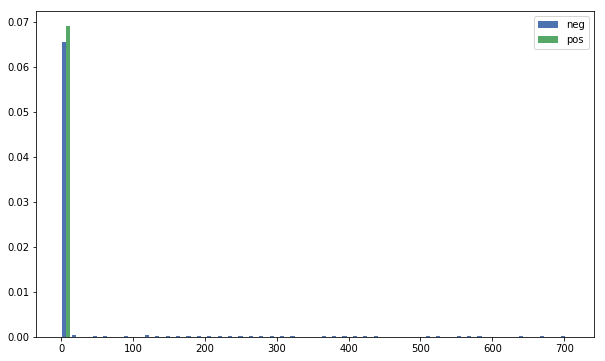

(0, 0.001)

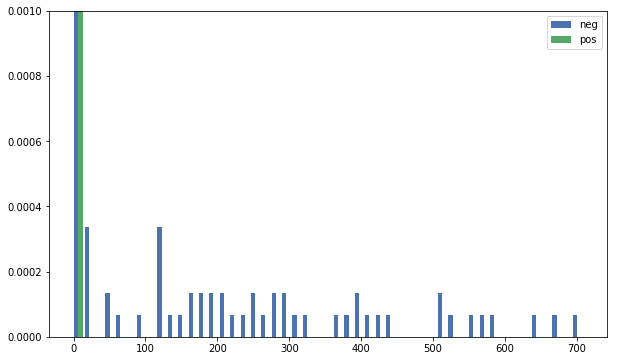

In [31]:
colname = 'c73721_max_min_dd'
max_val = max(df[~df[colname].isnull()][colname])
bins = np.linspace(-0.5, max_val, 50)

neg = df[df['pn_flag'] == 0][colname]
neg = neg[~neg.isnull()]
pos = df[df['pn_flag'] == 1][colname]
pos = pos[~pos.isnull()]

# Full range
plt.style.use('seaborn-deep')
_ = plt.hist([neg, pos], bins = bins, normed = True, label = ['neg', 'pos'])
plt.legend(loc='upper right')
plt.show()

# Zoom in on the lower side of the y-axis
plt.style.use('seaborn-deep')
_ = plt.hist([neg, pos], bins = bins, normed = True, label = ['neg', 'pos'])
plt.legend(loc='upper right')
plt.ylim((0,0.001))
plt.show()